                                                    EDA ANALYSIS FOR THE COMPANY

We will follow the steps below to perform EDA analysis on the company data:
1. Data manipulation:

    a. Importing the data
    
    b. Data duplicacy check

    c. Dropping unwanted columns

2. Data blending

3. Missing values handling:

    a. Missing values check
    
    b. Missing values imputation

4. Feature generation:

    a. Feature engineering
    
    b. Feature selection

5. Dimensionality reduction:

    a. Dimensionality reduction
    
    b. Feature selection

6. Outlier removal:

    a. Outlier removal
    
    b. Feature selection

7. Normalization:

    a. Normalization
    
    b. Feature selection

8. Paritioning:

    a. Partitioning
    
    b. Feature selection

*These steps according to dataset can be changed in accordance to buisness objective.*

                                                        DATA MANIPULATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data=pd.read_csv(r"C:\programming languages\Data science\Assignment-2\loan.csv",engine='python')
data2=pd.read_excel(r"C:\programming languages\Data science\Assignment-2\Data_Dictionary.xlsx")

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Shape of dataset
print('Number of rows   :',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows   : 39717
Number of columns: 111


AS DATASET IS HUGE SO WE ARE CHECKING FOR DUPLICATES IF ANY

In [5]:
if(len(data)!=len(data.member_id.unique())):
    print('Data is not clean')
else:
    print('Data is clean')

Data is clean


DROPPING UNWANTED COLUMNS

In [6]:
#dropping columns that are causing post loan problems to comapny
#This is done to meet business requirements and to avoid giving loans to people who are not eligible for loan

drop_cols = ["delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
             "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "chargeoff_within_12_mths"]
data.drop(drop_cols, axis=1, inplace=True)

In [7]:
#dropping columns of no use for analysis
data.drop(["id", "member_id", "funded_amnt","emp_title", "url", "desc", "title", "zip_code", "out_prncp_inv",
           "total_pymnt_inv", "last_credit_pull_d", "pub_rec_bankruptcies"], axis=1, inplace=True)

In [8]:
data.shape

(39717, 86)

Data blending is a technique to combine the data from different sources.

But before doing so, we need to understand the data sources and the data types.

Our data is already provided to us with full integrity so no need to check for new data

                                                      MISSING VALUES HANDLING

In [9]:
#checking for missing values and printing them in dataframe
null_data=pd.DataFrame()
null_data['Columns']=data.isnull().sum().index
null_data['Values']=data.isnull().sum().values


#printing column names with missing values count
print('Columns with missing values:')
null_data.drop(null_data[null_data['Values']==0].index,inplace=True)

null_data['% null']=null_data['Values']/data.shape[0]*100

null_data.sort_values(by='% null',ascending=False)

Columns with missing values:


,Columns,Values,% null
56,mo_sin_old_il_acct,39717,100.000000
70,num_il_tl,39717,100.000000
58,mo_sin_rcnt_rev_tl_op,39717,100.000000
59,mo_sin_rcnt_tl,39717,100.000000
60,mort_acc,39717,100.000000
61,mths_since_recent_bc,39717,100.000000
62,mths_since_recent_bc_dlq,39717,100.000000
63,mths_since_recent_inq,39717,100.000000
64,mths_since_recent_revol_delinq,39717,100.000000
65,num_accts_ever_120_pd,39717,100.000000


MISSING VALUES > 50%  >  DROPPING THE COLUMN

In [10]:
null_columns=null_data[null_data['% null']>=50]['Columns']
data.drop(columns=null_columns,inplace=True)

In [11]:
data.shape

(39717, 30)

Checking if imputation can be done if not then drop

In [12]:
data.isnull().sum()

loan_amnt                        0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
addr_state                       0
dti                              0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_util                      50
total_acc                        0
initial_list_status              0
collections_12_mths_ex_med      56
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt         

In [13]:
data.describe()

,loan_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,delinq_amnt,tax_liens
count,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39717.0,39678.0
mean,11219.443815,10397.448868,324.561922,6.896893e+04,13.315130,0.869200,9.294408,0.055065,22.088828,0.0,1.0,0.0,0.0,0.0
std,7456.670694,7128.450439,208.874874,6.379377e+04,6.678594,1.070219,4.400282,0.237200,11.401709,0.0,0.0,0.0,0.0,0.0
min,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,2.000000,0.0,1.0,0.0,0.0,0.0
25%,5500.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,6.000000,0.000000,13.000000,0.0,1.0,0.0,0.0,0.0
50%,10000.000000,8975.000000,280.220000,5.900000e+04,13.400000,1.000000,9.000000,0.000000,20.000000,0.0,1.0,0.0,0.0,0.0
75%,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,1.000000,12.000000,0.000000,29.000000,0.0,1.0,0.0,0.0,0.0
max,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,90.000000,0.0,1.0,0.0,0.0,0.0


REMOVING SINGLE VALUE COLUMNS

In [14]:
data.drop(['collections_12_mths_ex_med','policy_code','acc_now_delinq','delinq_amnt','tax_liens'],axis=1,inplace=True)

In [15]:
data.shape

(39717, 25)

In [16]:
unique_values=pd.DataFrame()
unique_values['Columns']=data.nunique().index
unique_values['Unique_Values']=data.nunique().values
unique_values.sort_values(by='Unique_Values')

,Columns,Unique_Values
24,application_type,1
13,pymnt_plan,1
23,initial_list_status,1
2,term,2
10,verification_status,3
12,loan_status,3
8,home_ownership,5
20,pub_rec,5
5,grade,7
18,inq_last_6mths,9


In [17]:
data.drop(['application_type','pymnt_plan','initial_list_status'],axis=1,inplace=True)

MISSING VALUE IMPUTATION

c:\Users\shivansh uppal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


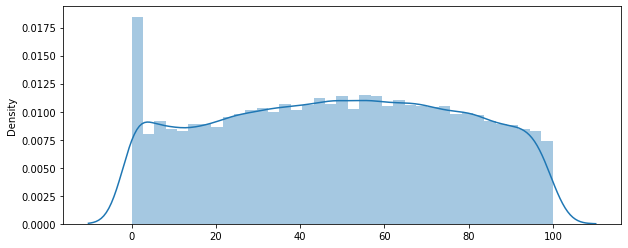

In [18]:
#visualizing data for revol_util
df=pd.DataFrame()

#slicing revol_util column and storing it in df by removing % sign
df['revol_util']=data['revol_util'].str.slice(0, -1)
plt.figure(figsize=(10,4))
sns.distplot(df)
plt.show()

<AxesSubplot:xlabel='revol_util'>

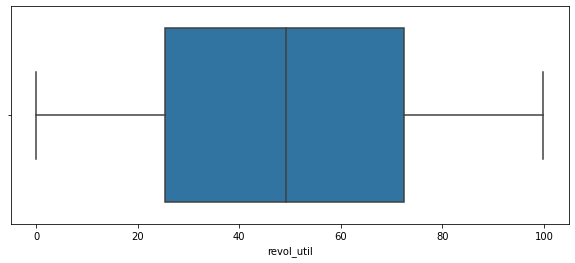

In [19]:
df.revol_util=np.float64(df.revol_util)
plt.figure(figsize=(10,4))
sns.boxplot(x='revol_util',data=df)

In [20]:
skewness=df.skew()
skewness

revol_util   -0.033579
dtype: float64

In [21]:
kurtosis=df.kurtosis()
kurtosis

revol_util   -1.105415
dtype: float64

In [22]:
df.fillna(df.mean(),inplace=True)

In [23]:
#putting back % sign to revol_util column and transferring it to the data dataframe
data=data.join(df['revol_util'].astype(str)+'%',lsuffix='_left')
data.drop('revol_util_left',axis=1,inplace=True)

In [24]:
data.shape

(39717, 22)

In [25]:
data.dropna(axis=0,inplace=True)

In [26]:
data.shape

(38642, 22)

                                                           FEATURE GENERATION

We have enough data to perform EDA analysis on the data so we don't need to generate new features.

                                                        DIMENSIONALITY REDUCTION

We have enough data to perform EDA analysis on the data so we don't need to reduce the dimensionality.

                                                            OUTLIER REMOVAL

#loan_amnt	 |    funded_amnt_inv	  |    installment	 |  annual_inc	 |  dti	 |  inq_last_6mths	|   open_acc	|   pub_rec	 |  total_acc

We will check if any outliers are present in the data and remove them if any.

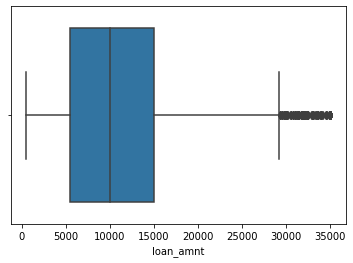

In [27]:
sns.boxplot(x='loan_amnt',data=data)
plt.show()

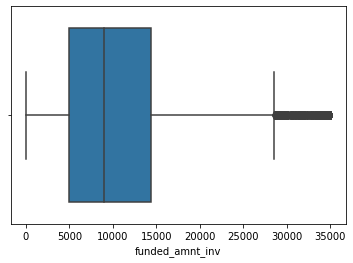

In [28]:
sns.boxplot(x='funded_amnt_inv',data=data)
plt.show()

<AxesSubplot:xlabel='installment'>

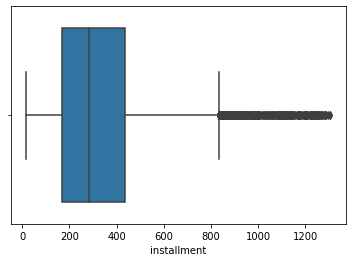

In [29]:
sns.boxplot(x='installment',data=data)

Referring to 3 boxplots above for outliers in the data set, it is clear that outliers are playing vital role, hence removing it will lead to inacurracy in results

                                                            NORMALIZATION

As we are not performing any model building, we will not normalize the data.

                                                            PARTITIONING

Data partitioning is a technique to split the data into training and testing sets.

Again as we are not performing any model building, we will not partition the data.

                                                        DATA VISUALIZATION

Gaining insights from the data to understand the big picture of the data.

In [30]:
data['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [31]:
#current status of loan is not adding value to why loan should not be given so dropping it
data=data[data['loan_status']!='Current']

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37544 non-null  int64  
 1   funded_amnt_inv      37544 non-null  float64
 2   term                 37544 non-null  object 
 3   int_rate             37544 non-null  object 
 4   installment          37544 non-null  float64
 5   grade                37544 non-null  object 
 6   sub_grade            37544 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       37544 non-null  object 
 9   annual_inc           37544 non-null  float64
 10  verification_status  37544 non-null  object 
 11  issue_d              37544 non-null  object 
 12  loan_status          37544 non-null  object 
 13  purpose              37544 non-null  object 
 14  addr_state           37544 non-null  object 
 15  dti                  37544 non-null 

UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='loan_status', ylabel='count'>

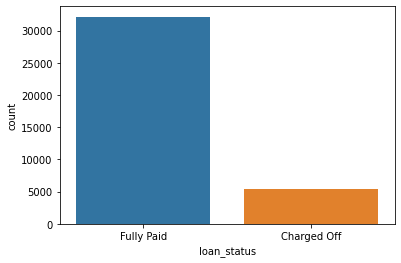

In [33]:
sns.countplot(x='loan_status',data=data)

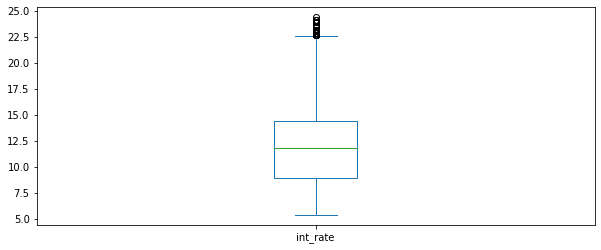

In [34]:
#visualizing data for int_rate
d1=pd.DataFrame()

#slicing int_rate column and storing it in df by removing % sign
d1['int_rate']=data['int_rate'].str.slice(0, -1)

d1.int_rate=np.float64(d1.int_rate)
plt.figure(figsize=(10,4))
d1.int_rate.plot(kind='box')
plt.show()

Median interest rate is around 12.5%. High interest rates are charged to few clients 24% max. 

<AxesSubplot:>

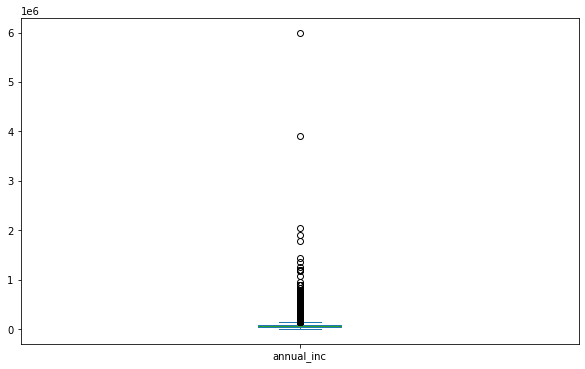

In [35]:
plt.figure(figsize=(10,6))
data.annual_inc.plot(kind='box')

Looks like people with very low income were offered loans.

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

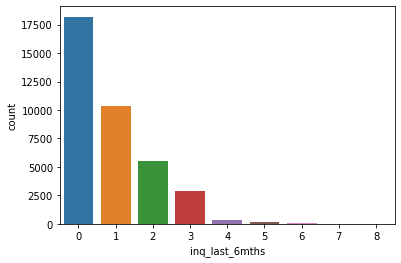

In [36]:
sns.countplot(data = data, x = 'inq_last_6mths')

Inquiries were high in start but decreased per month

<AxesSubplot:xlabel='grade', ylabel='count'>

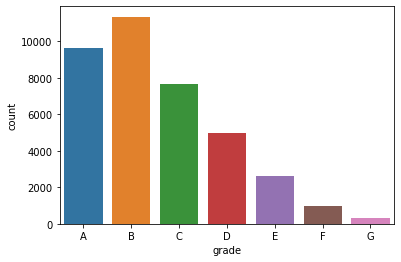

In [37]:
level_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.countplot(data = data, x = 'grade', order=level_order)

GRADE A AND B RECIEVED MAXIMUM LOANS AND WORSE GRADES RECIEVED MINIMUM LOANS

<AxesSubplot:xlabel='count', ylabel='purpose'>

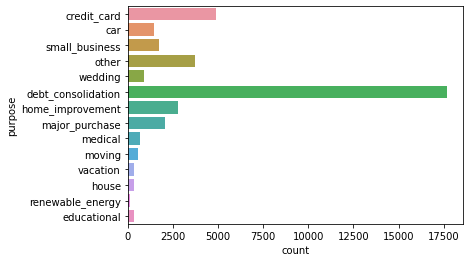

In [38]:
sns.countplot(y='purpose', data=data)

debt_consolidation makes up maximum of all data under Purpose category

BIVARAITE ANALYSIS

In [39]:
d1.head()

,int_rate
0,10.65
1,15.27
2,15.96
3,13.49
5,7.90


<AxesSubplot:xlabel='int_rate_bin', ylabel='count'>

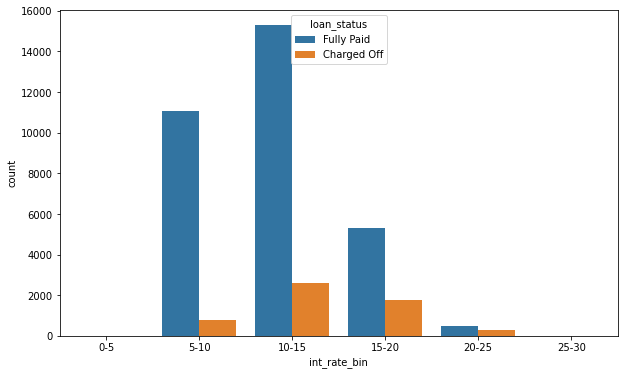

In [40]:
#intrest rate vs loan status
d1=pd.DataFrame()
d1['int_rate']=data['int_rate'].str.slice(0, -1)
d1.int_rate=np.float64(d1.int_rate)
d1['int_rate_bin'] = pd.cut(d1['int_rate'], 
                                [0,5,10,15,20,25,30], 
                                labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

d1=d1.join(data['loan_status'])
plt.figure(figsize=(10,6))
sns.countplot(x='int_rate_bin',data=d1,hue='loan_status')

In [41]:
d1=d1.join(data['annual_inc'])

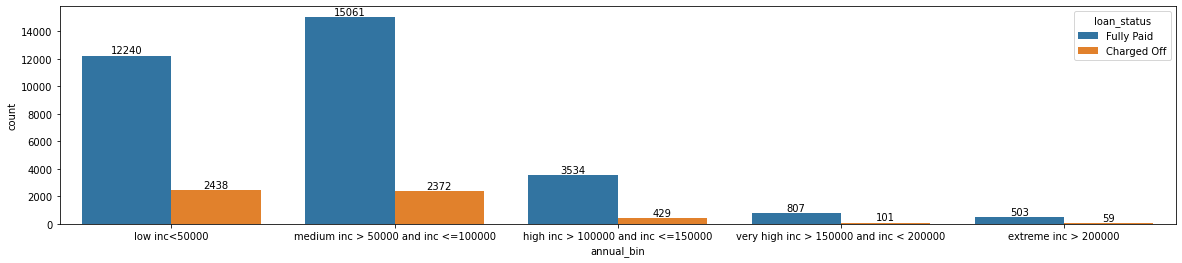

In [42]:
d1['annual_bin'] = pd.cut(d1['annual_inc'], 
                                [0,50000,100000,150000,200000,6.000000e+06],
                                labels=['low inc<50000','medium inc > 50000 and inc <=100000',
                                        'high inc > 100000 and inc <=150000','very high inc > 150000 and inc < 200000',
                                        'extreme inc > 200000'])

plt.figure(figsize=(20,4))
ax=sns.countplot(x='annual_bin',data=d1,hue='loan_status')

for i in ax.containers:
        ax.bar_label(i,)

Low and medium income people defaulted more

In [43]:
d1=d1.join(data['grade'])

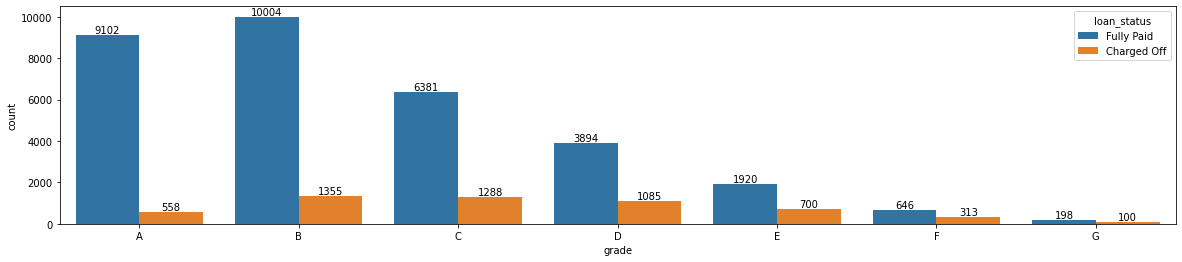

In [44]:
#sort the grade column in alphabetical order
d1.sort_values("grade",ascending=True,inplace=True)

plt.figure(figsize=(20,4))
ax=sns.countplot(x='grade',data=d1,hue='loan_status')

for i in ax.containers:
        ax.bar_label(i,)
plt.show()

DEFAULTERS % GRADE WISE CATEGORY WISE

1. Grade A: 5.7%

2. Grade B: 11.9%

3. Grade C: 16.8%

4. Grade D: 21.8%

5. Grade E: 26.7%

6. Grade F: 32.6%

7. Grade G: 33.5%


In [45]:
d1=d1.join(data['purpose'])

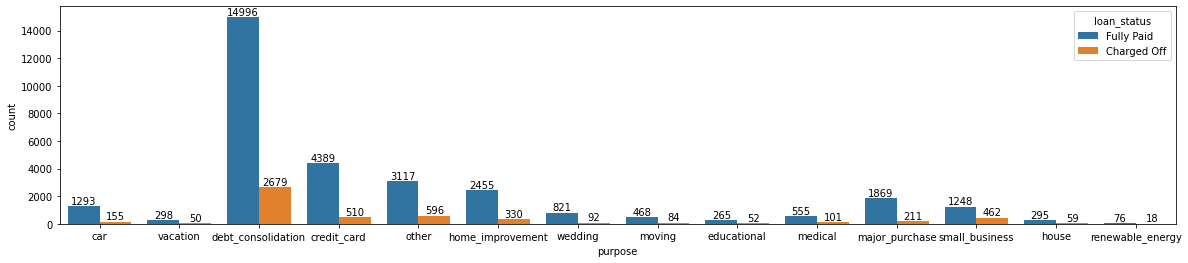

In [46]:
plt.figure(figsize=(20,4))
ax=sns.countplot(x='purpose',data=d1,hue='loan_status')

for i in ax.containers:
        ax.bar_label(i,)

plt.show()

In [47]:
d1=d1.join(data['dti'])

In [48]:
d1.describe()

,int_rate,annual_inc,dti
count,37544.000000,3.754400e+04,37544.000000
mean,11.963319,6.940708e+04,13.284186
std,3.683012,6.467698e+04,6.660551
min,5.420000,4.000000e+03,0.000000
25%,8.940000,4.100000e+04,8.160000
50%,11.830000,6.000000e+04,13.380000
75%,14.420000,8.300000e+04,18.550000
max,24.400000,6.000000e+06,29.990000


In [49]:
d1['dti_bin']=pd.cut(d1['dti'],[0,5,10,15,20,25,30],labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

In [50]:
if d1['dti_bin'].isnull().any():
    d1.dti_bin.fillna('0-5',inplace=True)

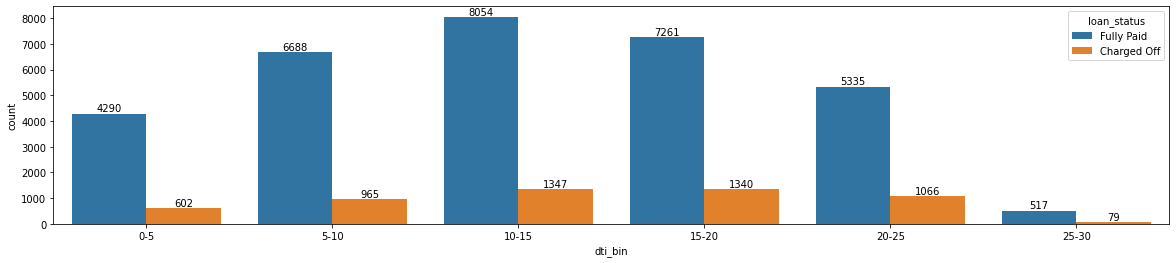

In [51]:
plt.figure(figsize=(20,4))
ax=sns.countplot(x='dti_bin',data=d1,hue='loan_status')

for i in ax.containers:
        ax.bar_label(i,)
plt.show()

MULTIVARIATE ANALYSIS

In [52]:
#CONSIDER debt_consolidation, home_improvement, credit_card, other as top 4 features
#considering low_income and medium income as top 2 features
#considering 5-10,10-15 int_rate_bin as top 2 features

main_purposes = ["debt_consolidation", "credit_card","home_improvement","major_purchase"]
d1 = d1[d1['purpose'].isin(main_purposes)]

incomes = ['low inc<50000','medium inc > 50000 and inc <=100000']
d1=d1[d1['annual_bin'].isin(incomes)]

interests=['0-5','5-10']
d1=d1[d1['int_rate_bin'].isin(interests)]

In [53]:
d1

,int_rate,int_rate_bin,loan_status,annual_inc,annual_bin,grade,purpose,dti,dti_bin
9489,6.99,5-10,Fully Paid,30000.0,low inc<50000,A,debt_consolidation,29.76,25-30
29436,7.51,5-10,Fully Paid,88000.0,medium inc > 50000 and inc <=100000,A,credit_card,19.61,15-20
9495,8.49,5-10,Fully Paid,56950.0,medium inc > 50000 and inc <=100000,A,debt_consolidation,19.79,15-20
9497,6.99,5-10,Fully Paid,65000.0,medium inc > 50000 and inc <=100000,A,credit_card,9.14,5-10
35153,7.40,5-10,Fully Paid,18000.0,low inc<50000,A,debt_consolidation,14.13,10-15
...,...,...,...,...,...,...,...,...,...
38340,6.00,5-10,Fully Paid,28000.0,low inc<50000,C,debt_consolidation,12.09,10-15
32746,6.00,5-10,Fully Paid,85000.0,medium inc > 50000 and inc <=100000,D,debt_consolidation,9.98,5-10
38712,6.00,5-10,Fully Paid,72000.0,medium inc > 50000 and inc <=100000,D,credit_card,14.07,10-15
16960,6.00,5-10,Fully Paid,75000.0,medium inc > 50000 and inc <=100000,D,home_improvement,3.09,0-5


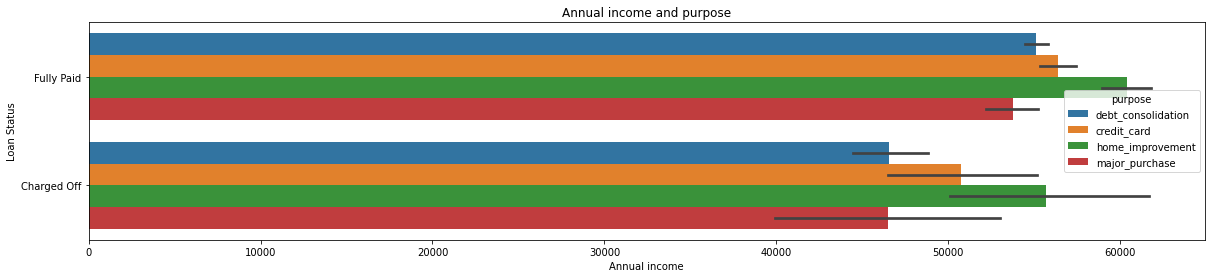

In [54]:
plt.figure(figsize=(20,4))
sns.barplot(x='annual_inc', y='loan_status', hue="purpose", data=d1)
plt.title('Annual income and purpose')
plt.xlabel('Annual income')
plt.ylabel('Loan Status')
plt.show()

In the purposes we chose to look at, home improvement and credit card were popular defaulters

In [55]:
d1.purpose.value_counts() / d1.shape[0]

debt_consolidation    0.579780
credit_card           0.200550
home_improvement      0.112792
major_purchase        0.106878
Name: purpose, dtype: float64

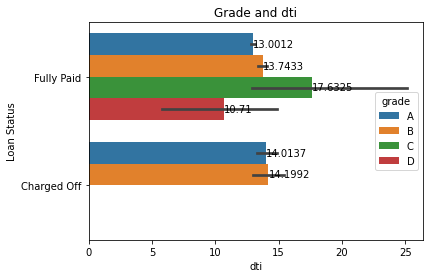

In [56]:
ax=sns.barplot(x='dti', y='loan_status', hue="grade", data=d1)
plt.title('Grade and dti')
plt.xlabel('dti')
plt.ylabel('Loan Status')

for i in ax.containers:
        ax.bar_label(i,)
plt.show()

In the purpose we chose to look at, people with grade C and D did not defaulted, while people with grades E,F,G were not eligible for loan 